In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading Data

In [13]:
df_train = pd.read_csv('dataset/train.csv')
df_train.head()

,row_id,time,x,y,direction,congestion
0,0,1991-04-01 00:00:00,0,0,EB,70
1,1,1991-04-01 00:00:00,0,0,NB,49
2,2,1991-04-01 00:00:00,0,0,SB,24
3,3,1991-04-01 00:00:00,0,1,EB,18
4,4,1991-04-01 00:00:00,0,1,NB,60


In [14]:
df_train

,row_id,time,x,y,direction,congestion
0,0,1991-04-01 00:00:00,0,0,EB,70
1,1,1991-04-01 00:00:00,0,0,NB,49
2,2,1991-04-01 00:00:00,0,0,SB,24
3,3,1991-04-01 00:00:00,0,1,EB,18
4,4,1991-04-01 00:00:00,0,1,NB,60
...,...,...,...,...,...,...
848830,848830,1991-09-30 11:40:00,2,3,NB,54
848831,848831,1991-09-30 11:40:00,2,3,NE,28
848832,848832,1991-09-30 11:40:00,2,3,SB,68
848833,848833,1991-09-30 11:40:00,2,3,SW,17


In [15]:
df_test = pd.read_csv('dataset/test.csv')
df_test.head()

,row_id,time,x,y,direction
0,848835,1991-09-30 12:00:00,0,0,EB
1,848836,1991-09-30 12:00:00,0,0,NB
2,848837,1991-09-30 12:00:00,0,0,SB
3,848838,1991-09-30 12:00:00,0,1,EB
4,848839,1991-09-30 12:00:00,0,1,NB


In [16]:
df_submission_example = pd.read_csv('dataset/sample_submission.csv')
df_submission_example.head()

,row_id,congestion
0,848835,0.0
1,848836,0.0
2,848837,0.0
3,848838,0.0
4,848839,0.0


## Data exploration

### Checking missing data:

In [17]:
# checking missing data:
df_train.isnull().any()

row_id        False
time          False
x             False
y             False
direction     False
congestion    False
dtype: bool

In [18]:
df_test.isnull().any()

row_id       False
time         False
x            False
y            False
direction    False
dtype: bool

(array([  3173.,  28562.,  95478., 156096., 176929., 163676., 130937.,
         73880.,  17647.,   2457.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

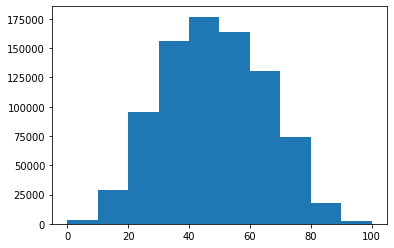

In [19]:
plt.hist(df_train['congestion'])

it can be observed that the distribution is almost normal

### Checking data types & converting

In [20]:
df_train.dtypes

row_id         int64
time          object
x              int64
y              int64
direction     object
congestion     int64
dtype: object

### Converting data types and encoding columns which are not numeric:

In [21]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['direction'])], axis=1)
df_train.head()

,row_id,time,x,y,direction,congestion,EB,NB,NE,NW,SB,SE,SW,WB
0,0,1991-04-01 00:00:00,0,0,EB,70,1,0,0,0,0,0,0,0
1,1,1991-04-01 00:00:00,0,0,NB,49,0,1,0,0,0,0,0,0
2,2,1991-04-01 00:00:00,0,0,SB,24,0,0,0,0,1,0,0,0
3,3,1991-04-01 00:00:00,0,1,EB,18,1,0,0,0,0,0,0,0
4,4,1991-04-01 00:00:00,0,1,NB,60,0,1,0,0,0,0,0,0


In [22]:
df_train = df_train.drop(columns='direction')

In [23]:
df_train

,row_id,time,x,y,congestion,EB,NB,NE,NW,SB,SE,SW,WB
0,0,1991-04-01 00:00:00,0,0,70,1,0,0,0,0,0,0,0
1,1,1991-04-01 00:00:00,0,0,49,0,1,0,0,0,0,0,0
2,2,1991-04-01 00:00:00,0,0,24,0,0,0,0,1,0,0,0
3,3,1991-04-01 00:00:00,0,1,18,1,0,0,0,0,0,0,0
4,4,1991-04-01 00:00:00,0,1,60,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
848830,848830,1991-09-30 11:40:00,2,3,54,0,1,0,0,0,0,0,0
848831,848831,1991-09-30 11:40:00,2,3,28,0,0,1,0,0,0,0,0
848832,848832,1991-09-30 11:40:00,2,3,68,0,0,0,0,1,0,0,0
848833,848833,1991-09-30 11:40:00,2,3,17,0,0,0,0,0,0,1,0


In [24]:
df_test = pd.concat([df_test, pd.get_dummies(df_test['direction'])], axis=1)
df_test = df_test.drop(columns='direction')
df_test.head()

,row_id,time,x,y,EB,NB,NE,NW,SB,SE,SW,WB
0,848835,1991-09-30 12:00:00,0,0,1,0,0,0,0,0,0,0
1,848836,1991-09-30 12:00:00,0,0,0,1,0,0,0,0,0,0
2,848837,1991-09-30 12:00:00,0,0,0,0,0,0,1,0,0,0
3,848838,1991-09-30 12:00:00,0,1,1,0,0,0,0,0,0,0
4,848839,1991-09-30 12:00:00,0,1,0,1,0,0,0,0,0,0


In [25]:
### TODO: split time in another columns

In [26]:
# convert str to datetime:
df_train['time'] = pd.to_datetime(df_train['time'])
df_test['time'] = pd.to_datetime(df_test['time'])

In [27]:
df_train['only_date'] = [d.date() for d in df_train['time']]
df_test['only_date'] = [d.date() for d in df_test['time']]

In [28]:
df_train['only_time'] = [d.time() for d in df_train['time']]
df_test['only_time'] = [d.time() for d in df_test['time']]

In [29]:
df_train

,row_id,time,x,y,congestion,EB,NB,NE,NW,SB,SE,SW,WB,only_date,only_time
0,0,1991-04-01 00:00:00,0,0,70,1,0,0,0,0,0,0,0,1991-04-01,00:00:00
1,1,1991-04-01 00:00:00,0,0,49,0,1,0,0,0,0,0,0,1991-04-01,00:00:00
2,2,1991-04-01 00:00:00,0,0,24,0,0,0,0,1,0,0,0,1991-04-01,00:00:00
3,3,1991-04-01 00:00:00,0,1,18,1,0,0,0,0,0,0,0,1991-04-01,00:00:00
4,4,1991-04-01 00:00:00,0,1,60,0,1,0,0,0,0,0,0,1991-04-01,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848830,848830,1991-09-30 11:40:00,2,3,54,0,1,0,0,0,0,0,0,1991-09-30,11:40:00
848831,848831,1991-09-30 11:40:00,2,3,28,0,0,1,0,0,0,0,0,1991-09-30,11:40:00
848832,848832,1991-09-30 11:40:00,2,3,68,0,0,0,0,1,0,0,0,1991-09-30,11:40:00
848833,848833,1991-09-30 11:40:00,2,3,17,0,0,0,0,0,0,1,0,1991-09-30,11:40:00


In [58]:
df_train['only_hour'] = [x.hour for x in df_train['only_time']]
df_test['only_hour'] = [x.hour for x in df_test['only_time']]

In [30]:
## converting datetime to a numeric timestamp:


In [59]:
df_train['timestamp'] = df_train.time.values.astype(np.int64) // 10 ** 9
df_train

,row_id,time,x,y,congestion,EB,NB,NE,NW,SB,SE,SW,WB,only_date,only_time,timestamp,only_hour
0,0,1991-04-01 00:00:00,0,0,70,1,0,0,0,0,0,0,0,1991-04-01,00:00:00,670464000,0
1,1,1991-04-01 00:00:00,0,0,49,0,1,0,0,0,0,0,0,1991-04-01,00:00:00,670464000,0
2,2,1991-04-01 00:00:00,0,0,24,0,0,0,0,1,0,0,0,1991-04-01,00:00:00,670464000,0
3,3,1991-04-01 00:00:00,0,1,18,1,0,0,0,0,0,0,0,1991-04-01,00:00:00,670464000,0
4,4,1991-04-01 00:00:00,0,1,60,0,1,0,0,0,0,0,0,1991-04-01,00:00:00,670464000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848830,848830,1991-09-30 11:40:00,2,3,54,0,1,0,0,0,0,0,0,1991-09-30,11:40:00,686230800,11
848831,848831,1991-09-30 11:40:00,2,3,28,0,0,1,0,0,0,0,0,1991-09-30,11:40:00,686230800,11
848832,848832,1991-09-30 11:40:00,2,3,68,0,0,0,0,1,0,0,0,1991-09-30,11:40:00,686230800,11
848833,848833,1991-09-30 11:40:00,2,3,17,0,0,0,0,0,0,1,0,1991-09-30,11:40:00,686230800,11


In [60]:
df_test['timestamp'] = df_test.time.values.astype(np.int64) // 10 ** 9
df_test

,row_id,time,x,y,EB,NB,NE,NW,SB,SE,SW,WB,only_date,only_time,timestamp,only_hour
0,848835,1991-09-30 12:00:00,0,0,1,0,0,0,0,0,0,0,1991-09-30,12:00:00,686232000,12
1,848836,1991-09-30 12:00:00,0,0,0,1,0,0,0,0,0,0,1991-09-30,12:00:00,686232000,12
2,848837,1991-09-30 12:00:00,0,0,0,0,0,0,1,0,0,0,1991-09-30,12:00:00,686232000,12
3,848838,1991-09-30 12:00:00,0,1,1,0,0,0,0,0,0,0,1991-09-30,12:00:00,686232000,12
4,848839,1991-09-30 12:00:00,0,1,0,1,0,0,0,0,0,0,1991-09-30,12:00:00,686232000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,851170,1991-09-30 23:40:00,2,3,0,1,0,0,0,0,0,0,1991-09-30,23:40:00,686274000,23
2336,851171,1991-09-30 23:40:00,2,3,0,0,1,0,0,0,0,0,1991-09-30,23:40:00,686274000,23
2337,851172,1991-09-30 23:40:00,2,3,0,0,0,0,1,0,0,0,1991-09-30,23:40:00,686274000,23
2338,851173,1991-09-30 23:40:00,2,3,0,0,0,0,0,0,1,0,1991-09-30,23:40:00,686274000,23


In [33]:
df_train['timestamp'].nunique()

13059

In [34]:
df_test['timestamp'].nunique()

36

### Checking column correlations

In [61]:
df_train.corr()

,row_id,x,y,congestion,EB,NB,NE,NW,SB,SE,SW,WB,timestamp,only_hour
row_id,1.000000,7.167761e-05,2.184311e-05,0.003324,-1.148939e-05,-9.547525e-06,6.278646e-06,1.308834e-05,-6.149253e-06,1.454260e-05,9.924312e-06,2.009349e-06,9.999970e-01,1.629942e-03
x,0.000072,1.000000e+00,-4.716851e-02,0.049721,-8.220349e-02,-8.220349e-02,6.382736e-02,1.915260e-01,-8.220349e-02,1.915260e-01,6.382736e-02,-2.677816e-02,1.018906e-18,1.512817e-17
y,0.000022,-4.716851e-02,1.000000e+00,-0.094124,-5.711885e-02,-5.711885e-02,1.177482e-01,-2.138806e-02,-5.711885e-02,-2.138806e-02,1.177482e-01,2.317793e-03,-8.866114e-20,3.860121e-17
congestion,0.003324,4.972085e-02,-9.412365e-02,1.000000,4.973370e-02,1.143908e-01,-1.622117e-01,-2.187634e-01,1.671426e-01,-1.374077e-01,-1.198540e-01,5.445736e-02,3.322576e-03,1.463255e-01
EB,-0.000011,-8.220349e-02,-5.711885e-02,0.049734,1.000000e+00,-2.264151e-01,-1.653057e-01,-8.478078e-02,-2.264151e-01,-8.478078e-02,-1.653057e-01,-2.147594e-01,-3.220678e-19,-8.940525e-18
NB,-0.000010,-8.220349e-02,-5.711885e-02,0.114391,-2.264151e-01,1.000000e+00,-1.653057e-01,-8.478078e-02,-2.264151e-01,-8.478078e-02,-1.653057e-01,-2.147594e-01,2.977960e-19,-1.236155e-17
NE,0.000006,6.382736e-02,1.177482e-01,-0.162212,-1.653057e-01,-1.653057e-01,1.000000e+00,-6.189845e-02,-1.653057e-01,-6.189845e-02,-1.206897e-01,-1.567958e-01,7.263590e-20,1.393841e-17
NW,0.000013,1.915260e-01,-2.138806e-02,-0.218763,-8.478078e-02,-8.478078e-02,-6.189845e-02,1.000000e+00,-8.478078e-02,-3.174603e-02,-6.189845e-02,-8.041632e-02,-1.409596e-19,1.887935e-17
SB,-0.000006,-8.220349e-02,-5.711885e-02,0.167143,-2.264151e-01,-2.264151e-01,-1.653057e-01,-8.478078e-02,1.000000e+00,-8.478078e-02,-1.653057e-01,-2.147594e-01,-1.366065e-19,-7.197731e-18
SE,0.000015,1.915260e-01,-2.138806e-02,-0.137408,-8.478078e-02,-8.478078e-02,-6.189845e-02,-3.174603e-02,-8.478078e-02,1.000000e+00,-6.189845e-02,-8.041632e-02,1.107227e-19,1.826799e-17


In [36]:
#TODO: more conversions, work with time columns later

In [45]:
import seaborn as sns


In [ ]:
# sns.pairplot(df_train, hue='congestion')

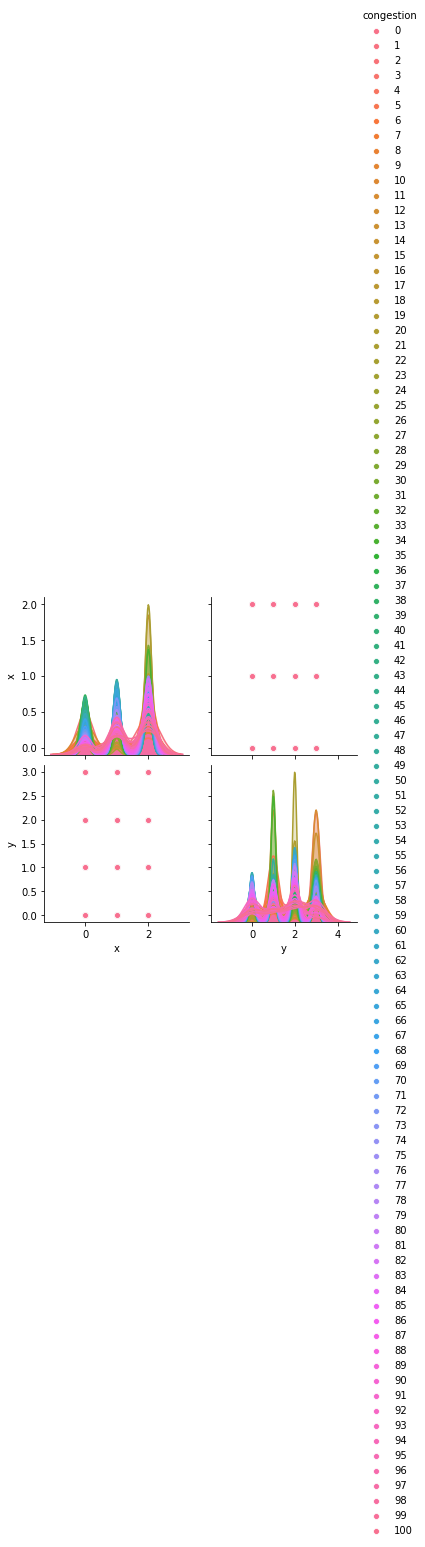

In [50]:
sns.pairplot(df_train[['x', 'y', 'congestion']], hue='congestion')

## Selecting columns

In [37]:
#selecting columns, excluding the time column at first:

In [38]:
y_train = df_train['congestion'].to_numpy()
# X_train = df_train.drop(columns=['row_id', 'only_date', 'only_time', 'time', 'congestion']).to_numpy()
X_train = df_train.drop(columns=['row_id', 'only_date', 'only_time', 'time', 'congestion', 'timestamp']).to_numpy()

In [62]:
# X_test = df_test.drop(columns=['row_id', 'only_date', 'only_time', 'time']).to_numpy()
X_test = df_test.drop(columns=['row_id', 'only_date', 'only_time', 'time', 'timestamp']).to_numpy()

In [64]:
print("train shapes:", X_train.shape, y_train.shape)
print("test shapes:", X_test.shape)

train shapes: (848835, 11) (848835,)
test shapes: (2340, 11)


## Model training

### Linear regression

In [94]:
# TODO later: train validation split

In [95]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [96]:
y_pred_test = reg.predict(X_test)

In [97]:
y_pred_test

array([38.80486838, 41.08761081, 42.95003009, ..., 47.81735261,
       35.47738423, 43.72206759])

### Lasso Regression

In [98]:
from sklearn import linear_model

#TODO: tune alpha param
clf = linear_model.Lasso(alpha=0.1)
clf = clf.fit(X_train, y_train)
y_pred_test_lasso = clf.predict(X_test)

In [99]:
y_pred_test_lasso

array([38.89011529, 41.17289117, 43.03530752, ..., 46.64876931,
       35.95938126, 42.56122492])

### Ridge Regression

In [100]:
from sklearn import linear_model

#TODO: tune alpha param
clf = linear_model.Ridge()
clf = clf.fit(X_train, y_train)
y_pred_test_ridge = clf.predict(X_test)


/home/mdiannna/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.70594e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [101]:
y_pred_test_ridge

array([38.80489923, 41.08762709, 42.95003448, ..., 47.81720548,
       35.47734316, 43.72194938])

### ElasticNet Regression

In [102]:
reg = linear_model.ElasticNet(alpha=.1)

reg = reg.fit(X_train, y_train)
y_pred_test_elasticnet = reg.predict(X_test)


In [103]:
y_pred_test_elasticnet

array([39.50949604, 41.30584281, 42.7714735 , ..., 44.07867862,
       35.68432391, 40.90497305])

### LARS

In [104]:
reg = linear_model.LassoLars(alpha=.1, normalize=False)

reg = reg.fit(X_train, y_train)
y_pred_test_lars = reg.predict(X_test)


In [105]:
y_pred_test_lars

array([38.8900379 , 41.17278032, 43.0351996 , ..., 46.64885601,
       35.95946467, 42.56131339])

## Evaluate model

In [77]:
#TODO: train val split first
# reg.score(X_val, y_val) 

In [ ]:
#TODO

## Submission of results

### Linear regression - OLS

In [69]:
df_submit1 = df_submission_example
df_submission_example['congestion'] = y_pred_test

In [70]:
df_submission_example

,row_id,congestion
0,848835,38.804868
1,848836,41.087611
2,848837,42.950030
3,848838,38.074657
4,848839,40.357399
...,...,...
2335,851170,45.954933
2336,851171,33.429098
2337,851172,47.817353
2338,851173,35.477384


In [71]:
# df_submit1['congestion'].astype('float')

In [72]:
# df_submission_example['congestion'].map('{:,.2f}'.format)

In [73]:
df_submit1.to_csv('submission2.csv', index=False)

### Lasso

In [108]:
df_submit1 = df_submission_example
df_submission_example['congestion'] = y_pred_test_lasso
df_submit1.to_csv('submission2_lasso.csv', index=False)

### Ridge

In [110]:
df_submit1 = df_submission_example
df_submission_example['congestion'] = y_pred_test_ridge
df_submit1.to_csv('submission2_ridge.csv', index=False)

### ElasticNet

In [111]:
df_submit1 = df_submission_example
df_submission_example['congestion'] = y_pred_test_elasticnet
df_submit1.to_csv('submission2_elasticnet.csv', index=False)

### LARS

In [112]:
df_submit1 = df_submission_example
df_submission_example['congestion'] = y_pred_test_lars
df_submit1.to_csv('submission2_lars.csv', index=False)